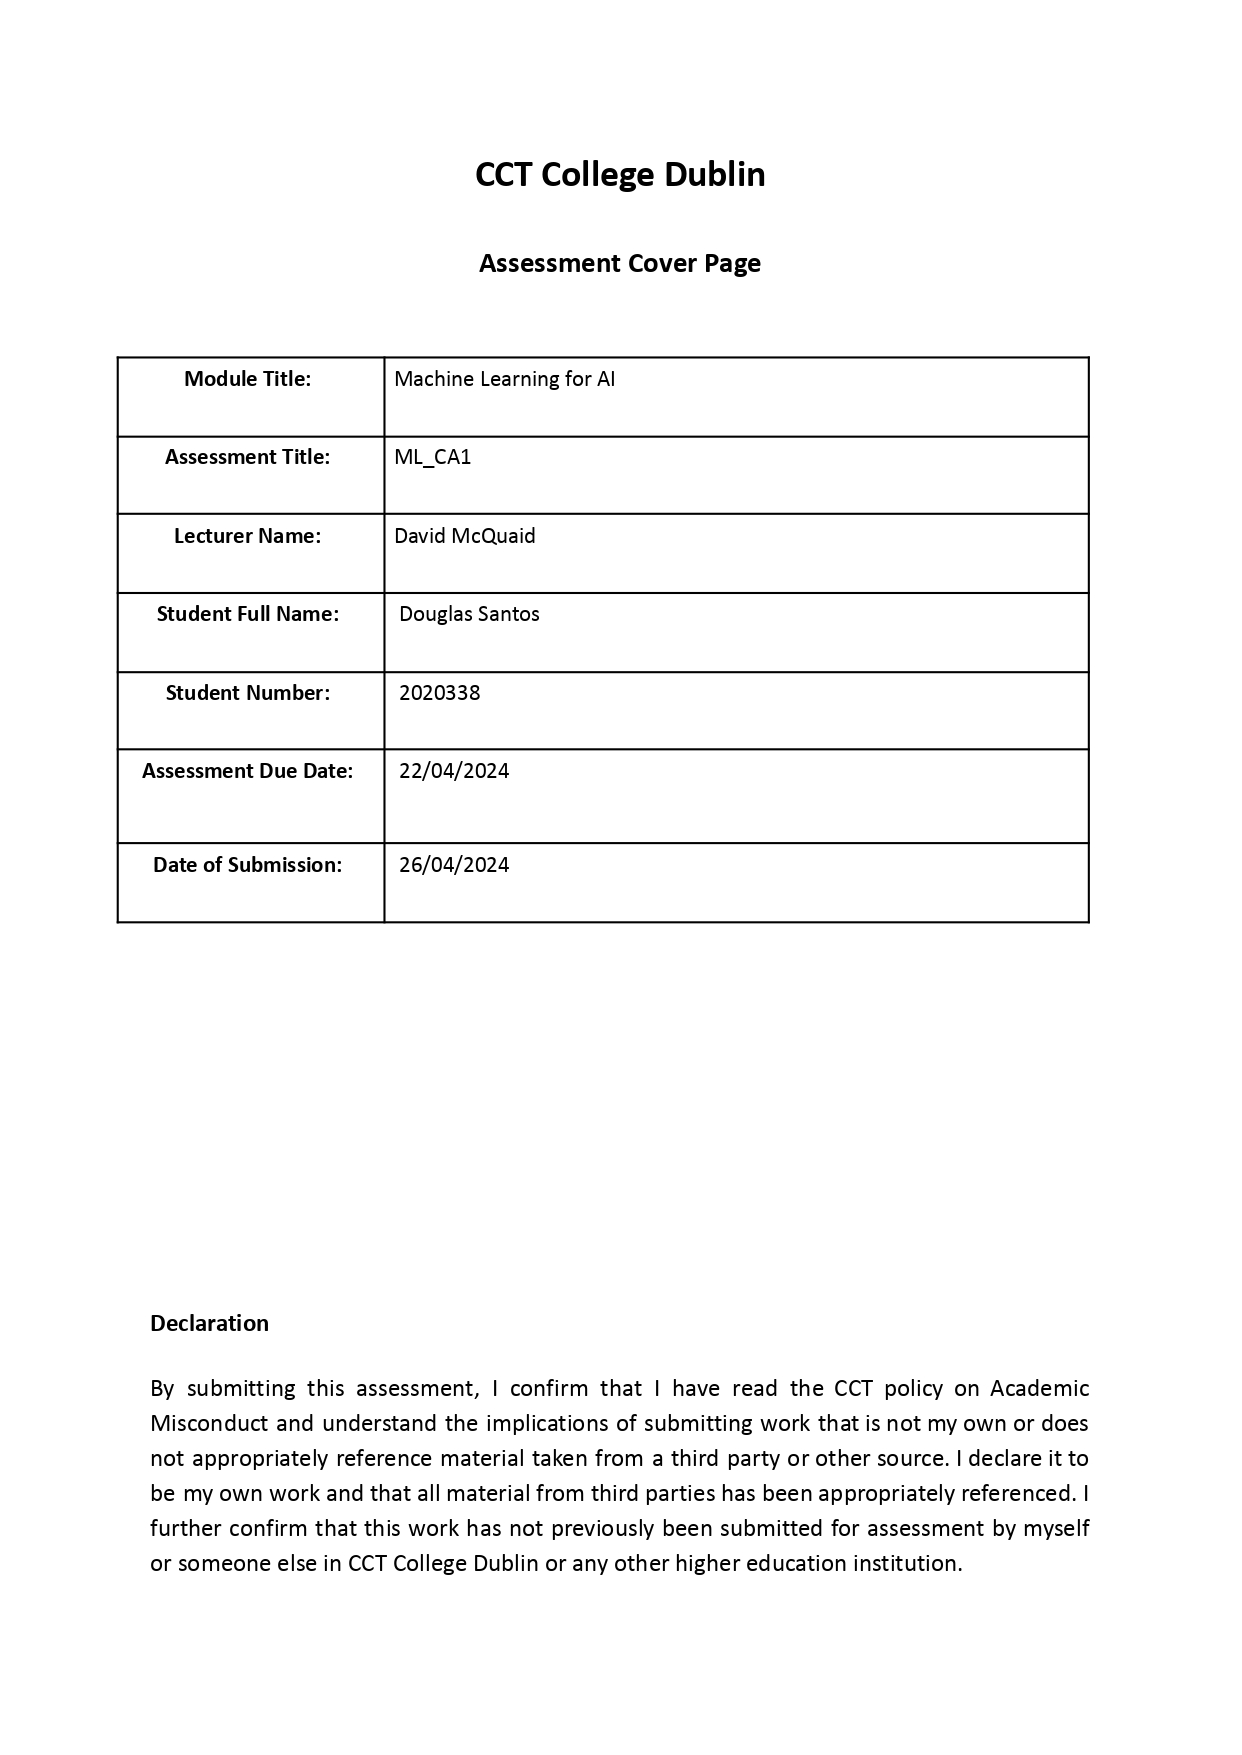

# Assesment Tasks

### Exploratory Data Analysis and Data Preparation

In [138]:
import pandas as pd

In [139]:
# Load the dataset
df = pd.read_csv('log2.csv')
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop
65530,54870,445,0,0,70,70,0,1,0,1,0,drop


In [140]:
df.shape

(65532, 12)

In [141]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [142]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

In [143]:
df.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
Action                  object
dtype: object

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [145]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [146]:
df.describe(include='object')

,Action
count,65532
unique,4
top,allow
freq,37640


In [147]:
# checking for missing values
print(df.isnull().sum())

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64


In [148]:
# Value count of 'action'
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

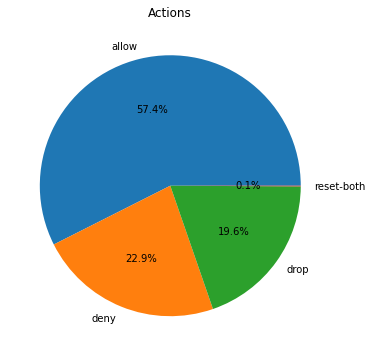

In [149]:
# Visualizing the distribution of 'Action'
plt.figure(figsize=(8,6))
df['Action'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Actions')
plt.ylabel('') 
plt.show()

In [150]:
df.corr()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
Source Port,1.000000,-0.332246,0.145391,-0.024843,0.000221,-0.000931,0.001950,-0.001742,-0.046515,-0.001422,-0.001962
Destination Port,-0.332246,1.000000,-0.281676,0.410042,-0.005297,0.001675,-0.014684,-0.006063,0.023537,-0.002134,-0.010909
NAT Source Port,0.145391,-0.281676,1.000000,0.178435,0.010659,0.002242,0.020827,0.012633,0.141485,0.007180,0.018772
NAT Destination Port,-0.024843,0.410042,0.178435,1.000000,0.003975,0.007904,-0.003216,0.004605,0.219776,0.006136,0.001747
Bytes,0.000221,-0.005297,0.010659,0.003975,1.000000,0.933462,0.830225,0.974379,0.148834,0.966548,0.850209
Bytes Sent,-0.000931,0.001675,0.002242,0.007904,0.933462,1.000000,0.575047,0.887596,0.126039,0.973976,0.639098
Bytes Received,0.001950,-0.014684,0.020827,-0.003216,0.830225,0.575047,1.000000,0.843067,0.143601,0.690959,0.946039
Packets,-0.001742,-0.006063,0.012633,0.004605,0.974379,0.887596,0.843067,1.000000,0.147074,0.961286,0.916978
Elapsed Time (sec),-0.046515,0.023537,0.141485,0.219776,0.148834,0.126039,0.143601,0.147074,1.000000,0.135101,0.143954
pkts_sent,-0.001422,-0.002134,0.007180,0.006136,0.966548,0.973976,0.690959,0.961286,0.135101,1.000000,0.771550


In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

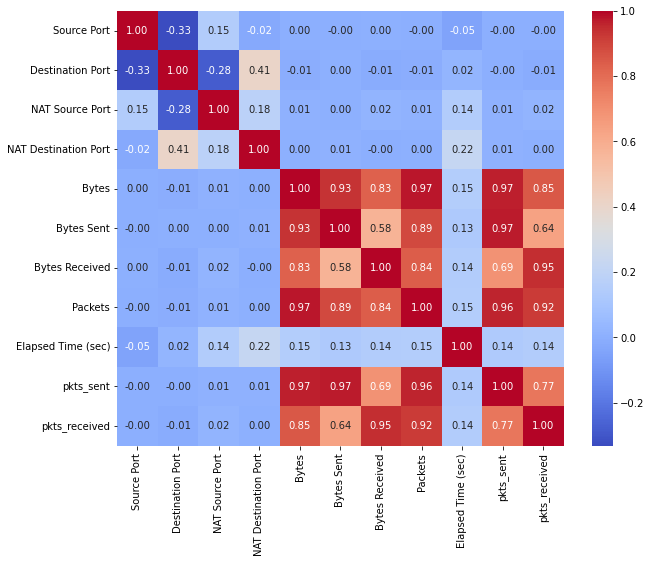

In [154]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm');

In [33]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

In [55]:
# Filter the DataFrame to include only rows where traffic is allowed
allowed_traffic_df = df[df['Action'] == 'allow']

# Extract unique ports that have allowed traffic
source_ports = allowed_traffic_df['Source Port'].unique()
destination_ports = allowed_traffic_df['Destination Port'].unique()

# Printing the list of ports that allow traffic
print("Source Ports Allowing Traffic:", source_ports)
print("Destination Ports Allowing Traffic:", destination_ports)

Source Ports Allowing Traffic: [57222 56258  6881 ... 36226 58574 50964]
Destination Ports Allowing Traffic: [   53  3389 50321 ... 47961 32277 22455]


In [56]:
# Analyzing traffic volume for allowed traffic
allowed_traffic_df.groupby(['Source Port', 'Destination Port'])['Bytes'].sum().reset_index().sort_values(by='Bytes', ascending=False)


,Source Port,Destination Port,Bytes
17664,57235,15187,1269359015
1006,15792,3478,428935914
8827,50121,443,307134285
19323,59275,443,242735602
994,15503,62336,127653507
...,...,...,...
222,5938,47512,60
223,5938,47968,60
215,5938,20273,60
1018,16387,25523,60


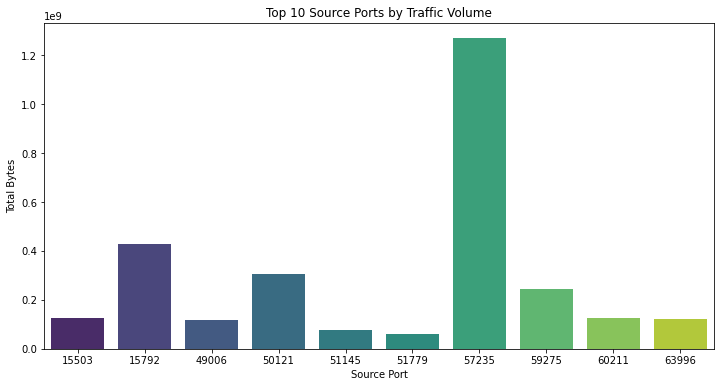

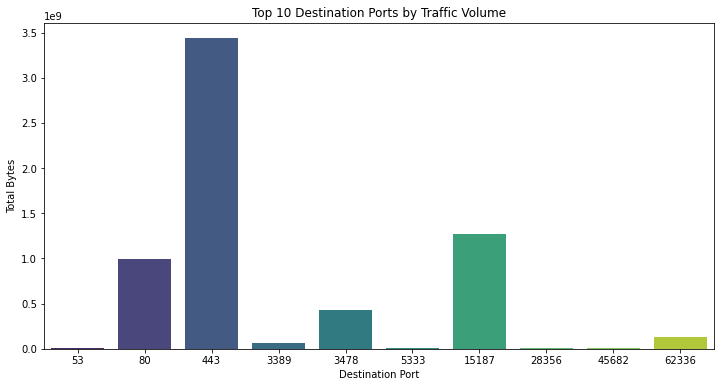

In [57]:
# Calculate total traffic for each port
source_traffic = allowed_traffic_df.groupby('Source Port')['Bytes'].sum().sort_values(ascending=False).head(10)
destination_traffic = allowed_traffic_df.groupby('Destination Port')['Bytes'].sum().sort_values(ascending=False).head(10)

# Plot for source ports
plt.figure(figsize=(12, 6))
sns.barplot(x=source_traffic.index, y=source_traffic.values, palette='viridis')
plt.title('Top 10 Source Ports by Traffic Volume')
plt.xlabel('Source Port')
plt.ylabel('Total Bytes')
plt.show()

# Plot for destination ports
plt.figure(figsize=(12, 6))
sns.barplot(x=destination_traffic.index, y=destination_traffic.values, palette='viridis')
plt.title('Top 10 Destination Ports by Traffic Volume')
plt.xlabel('Destination Port')
plt.ylabel('Total Bytes')
plt.show()


# Models

## Decision Tree

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [161]:
# Prepare features and target variable
X = df.drop('Action', axis=1)
y = df['Action']

# print(X)
# print(y)

In [196]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize the classifier and train the model using the training data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Calculate training set accuracy
train_predictions = model.predict(X_train)
train_accuracy_dtc = accuracy_score(y_train, train_predictions)

# Calculate testing set accuracy
test_predictions = model.predict(X_test)
test_accuracy_dtc = accuracy_score(y_test, test_predictions)

# Print out accuracy results
print(f"Training Set Accuracy: {train_accuracy_dtc * 100:.2f}%")
print(f"Testing Set Accuracy: {test_accuracy_dtc * 100:.2f}%")

Training Set Accuracy: 99.98%
Testing Set Accuracy: 99.81%


#### The Decision Tree model works well with the dataset presented, capturing essential patterns without overfitting, and demonstrates good and strong generalization with unseen data.

In [168]:
# Print the confusion matrix to evaluate the accuracy of the classification
print(confusion_matrix(y_test, predictions))

[[7553    4    0    0]
 [   2 2931    5    4]
 [   0    9 2592    0]
 [   0    2    0    5]]


#### The confusion matrix shows that the model performs well with minimal misclassifications, except for 'reset-both' because of the small sample.

In [169]:
# Print the classification report to show the main classification metrics
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7557
        deny       0.99      1.00      1.00      2942
        drop       1.00      1.00      1.00      2601
  reset-both       0.56      0.71      0.63         7

    accuracy                           1.00     13107
   macro avg       0.89      0.93      0.90     13107
weighted avg       1.00      1.00      1.00     13107



#### The report shows that the model is very good at not labeling a negative sample as positive. It is also good at finding all positive samples. The precision for 'reset-both' is low as expected due to the small sample. F1-Score reflects that.

In [130]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

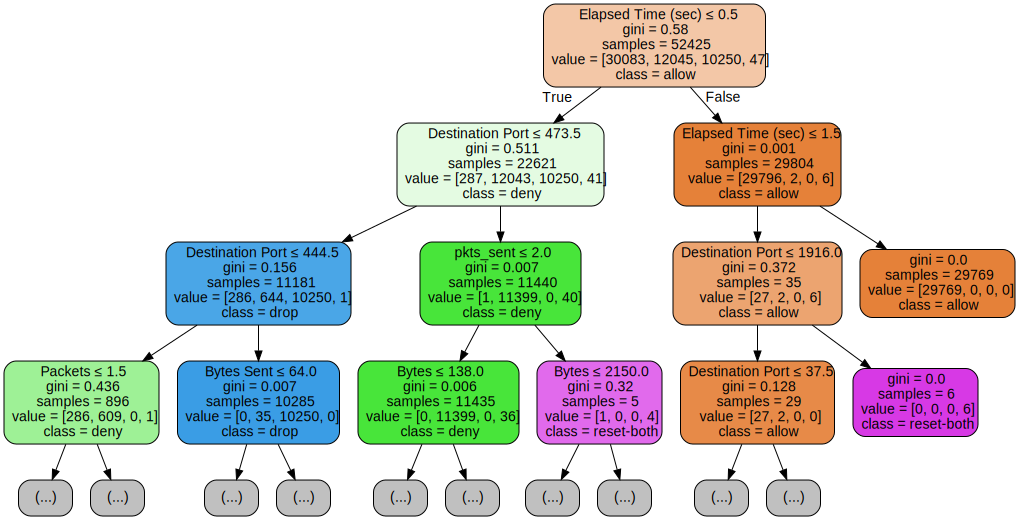

In [135]:
# Plot the tree model
dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=label_encoder.classes_,
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=3,
                         )

graph = graphviz.Source(dot_data)

graph

## KNN

In [172]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [177]:
# Encode the categorical target variable 'Action'
label_encoder = LabelEncoder()
df['Action'] = label_encoder.fit_transform(df['Action'])

# Prepare features and target variable
X = df.drop('Action', axis=1)
y = df['Action']

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [197]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Calculate accuracy on the training set
train_predictions_2 = knn.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, train_predictions_2)

# Calculate accuracy on the testing set
test_predictions_2 = knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, test_predictions_2)

# Print out results
print(f"Training Set Accuracy: {train_accuracy_knn * 100:.2f}%")
print(f"Testing Set Accuracy: {test_accuracy_knn * 100:.2f}%")

Training Set Accuracy: 99.47%
Testing Set Accuracy: 99.44%


#### The KNN model shows excellent accuracy on training data and testing data, showing strong predictive performance and generalization to new data. The minor difference suggests minimal overfitting, maintaining stability and reliability across different data samples.

In [185]:
cm = confusion_matrix(y_test, predictions_2)
print(cm)

[[7537   20    0    0]
 [   4 2930    8    0]
 [   0    0 2601    0]
 [   2    5    0    0]]


#### The KNN model performs as well as the Decition Tree. However, it misclassifies all samples from 'reset-both', making it a worse model. 

In [183]:
print(classification_report(y_test, predictions_2, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7557
           1       0.99      1.00      0.99      2942
           2       1.00      1.00      1.00      2601
           3       0.00      0.00      0.00         7

    accuracy                           1.00     13107
   macro avg       0.75      0.75      0.75     13107
weighted avg       1.00      1.00      1.00     13107



#### Similarly, the report shows good scores for 'allow', 'deny', and 'drop', but zeroes for 'reset-both', making it unable to deal with the small sample providaded.

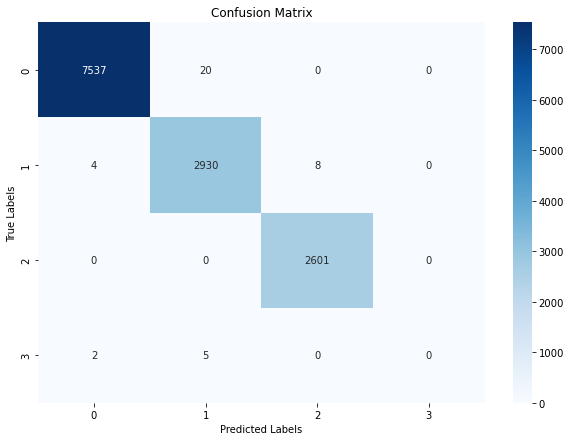

In [188]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()